In [219]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load the dataset
df = pd.read_csv('Sales Data.csv')


# Display the first few rows and summary statistics
print(df.head(5))
print(df.info())
print(df.describe())

   Unnamed: 0  Order ID               Product  Quantity Ordered  Price Each  \
0           0    295665    Macbook Pro Laptop                 1     1700.00   
1           1    295666    LG Washing Machine                 1      600.00   
2           2    295667  USB-C Charging Cable                 1       11.95   
3           3    295668      27in FHD Monitor                 1      149.99   
4           4    295669  USB-C Charging Cable                 1       11.95   

            Order Date                        Purchase Address  Month  \
0  2019-12-30 00:01:00  136 Church St, New York City, NY 10001     12   
1  2019-12-29 07:03:00     562 2nd St, New York City, NY 10001     12   
2  2019-12-12 18:21:00    277 Main St, New York City, NY 10001     12   
3  2019-12-22 15:13:00     410 6th St, San Francisco, CA 94016     12   
4  2019-12-18 12:38:00           43 Hill St, Atlanta, GA 30301     12   

     Sales            City  Hour  
0  1700.00   New York City     0  
1   600.00   New

In [221]:
# Handle missing values
df.isnull().sum()
#there is no missing values.

# Convert data types if necessary
df['Order Date'] = pd.to_datetime(df['Order Date'])
print(df.info())

# Create any new columns needed for analysis
df['pincode'] = ['434565'] * len(df)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Unnamed: 0        185950 non-null  int64         
 1   Order ID          185950 non-null  int64         
 2   Product           185950 non-null  object        
 3   Quantity Ordered  185950 non-null  int64         
 4   Price Each        185950 non-null  float64       
 5   Order Date        185950 non-null  datetime64[ns]
 6   Purchase Address  185950 non-null  object        
 7   Month             185950 non-null  int64         
 8   Sales             185950 non-null  float64       
 9   City              185950 non-null  object        
 10  Hour              185950 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(5), object(3)
memory usage: 15.6+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data colu

<Axes: xlabel='Sales', ylabel='Count'>

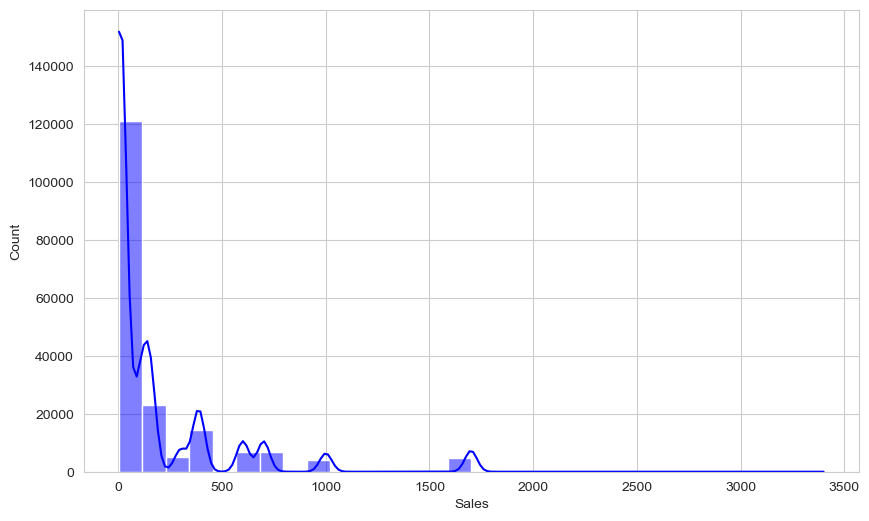

In [227]:

# Univariate analysis

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv('Sales Data.csv')

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="Sales", kde=True, color="blue", bins=30)





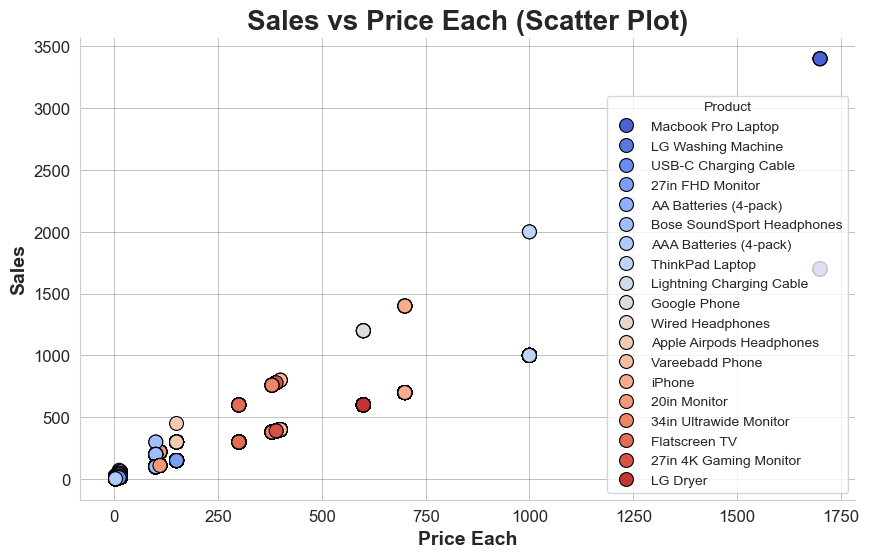

In [235]:
# Bivariate analysis

import matplotlib.pyplot as plt
import seaborn as sns

# Set the style and palette
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

scatterplot = sns.scatterplot(data=df, x="Price Each", y="Sales", hue="Product", palette="coolwarm", s=100, edgecolor="black")


scatterplot.set_title("Sales vs Price Each (Scatter Plot)", fontsize=20, weight='bold')
scatterplot.set_xlabel("Price Each", fontsize=14, weight='bold')
scatterplot.set_ylabel("Sales", fontsize=14, weight='bold')

scatterplot.spines['top'].set_visible(False)
scatterplot.spines['right'].set_visible(False)
scatterplot.spines['left'].set_visible(True)
scatterplot.spines['bottom'].set_visible(True)
scatterplot.xaxis.set_ticks_position('none')
scatterplot.yaxis.set_ticks_position('none')
scatterplot.xaxis.set_tick_params(labelsize=12)
scatterplot.yaxis.set_tick_params(labelsize=12)
scatterplot.grid(color='gray', linestyle='-', linewidth=0.5, alpha=0.7)

plt.show()



In [185]:
# Summary statistics for key variables


summary_stats = df.describe(include='all')
print(summary_stats) 



           Unnamed: 0       Order ID               Product  Quantity Ordered  \
count   185950.000000  185950.000000                185950     185950.000000   
unique            NaN            NaN                    19               NaN   
top               NaN            NaN  USB-C Charging Cable               NaN   
freq              NaN            NaN                 21903               NaN   
mean      8340.388475  230417.569379                   NaN          1.124383   
min          0.000000  141234.000000                   NaN          1.000000   
25%       3894.000000  185831.250000                   NaN          1.000000   
50%       7786.000000  230367.500000                   NaN          1.000000   
75%      11872.000000  275035.750000                   NaN          1.000000   
max      25116.000000  319670.000000                   NaN          9.000000   
std       5450.554093   51512.737110                   NaN          0.442793   

           Price Each                  

In [237]:

# Grouped statistics

df = pd.read_csv('Sales Data.csv')

group_stats = df.groupby('City').agg({
    'Sales': ['mean', 'std', 'min', 'max'],
    'Quantity Ordered': ['mean', 'std', 'min', 'max']
})

print(group_stats)

                    Sales                           Quantity Ordered  \
                     mean         std   min     max             mean   
City                                                                   
Atlanta        187.856903  334.718438  2.99  1700.0         1.115651   
Austin         183.703357  331.422431  2.99  1700.0         1.125997   
Boston         183.688272  329.170753  2.99  3400.0         1.130129   
Dallas         186.772969  334.470044  2.99  1700.0         1.128880   
Los Angeles    184.177362  332.210665  2.99  1700.0         1.124438   
New York City  187.502711  336.215735  2.99  3400.0         1.122849   
Portland       186.160498  336.974374  2.99  1700.0         1.127397   
San Francisco  184.704550  332.564510  2.99  3400.0         1.123111   
Seattle        186.516120  329.067523  2.99  1700.0         1.123608   

                                 
                    std min max  
City                             
Atlanta        0.422960   1   7  

In [239]:
from scipy.stats import ttest_ind, chi2_contingency

# Example: T-test for sales in different regions
import numpy as np
from scipy.stats import ttest_ind

city_a_sales = [1700, 600, 11.95, 3.84]
city_b_sales = [23.9, 99.99, 11.96]


t_statis, p_value = ttest_ind(city_a_sales, city_b_sales)

print(f"T-statistic: {t_statis}")

alpha = 0.05
if p_value < alpha:
    print("Significant difference  sales btw cities")
else:
    print("No significant difference sales btw cities")







T-statistic: 1.129338140761255
No significant difference sales btw cities


In [191]:
from scipy.stats import ttest_ind, chi2_contingency



# Example: Chi-square test for independence between Ship Mode and Customer Segment
import pandas as pd


df = pd.read_csv('Sales Data.csv') 

print(df.head())


print(df.columns)


contingency_table = pd.crosstab(df['Product'], df['City'])
print(contingency_table)

import scipy.stats as stats


chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-square Statistic: {chi2}")



   Unnamed: 0  Order ID               Product  Quantity Ordered  Price Each  \
0           0    295665    Macbook Pro Laptop                 1     1700.00   
1           1    295666    LG Washing Machine                 1      600.00   
2           2    295667  USB-C Charging Cable                 1       11.95   
3           3    295668      27in FHD Monitor                 1      149.99   
4           4    295669  USB-C Charging Cable                 1       11.95   

            Order Date                        Purchase Address  Month  \
0  2019-12-30 00:01:00  136 Church St, New York City, NY 10001     12   
1  2019-12-29 07:03:00     562 2nd St, New York City, NY 10001     12   
2  2019-12-12 18:21:00    277 Main St, New York City, NY 10001     12   
3  2019-12-22 15:13:00     410 6th St, San Francisco, CA 94016     12   
4  2019-12-18 12:38:00           43 Hill St, Atlanta, GA 30301     12   

     Sales            City  Hour  
0  1700.00   New York City     0  
1   600.00   New

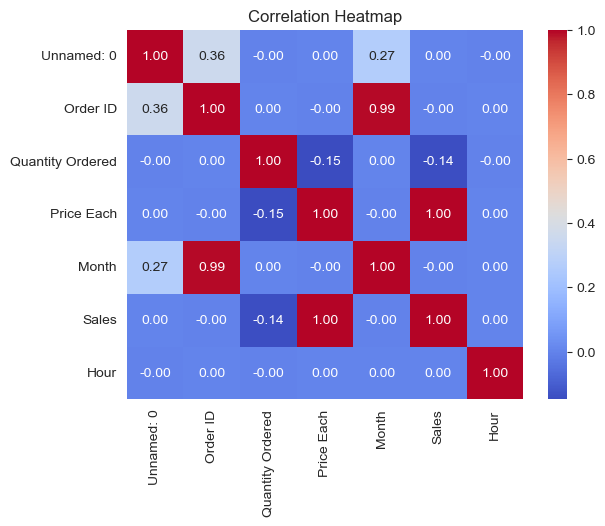

In [193]:
# Selecting only numeric columns for correlation matrix


import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv('Sales Data.csv')

numeric_data = data.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_data.corr()

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", annot_kws={"size": 10})
plt.title("Correlation Heatmap")
plt.show()


C:\Users\johnw\AppData\Local\Temp\ipykernel_16416\2025887395.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sales_trend = data.resample('M', on='Order Date')['Quantity Ordered'].sum()


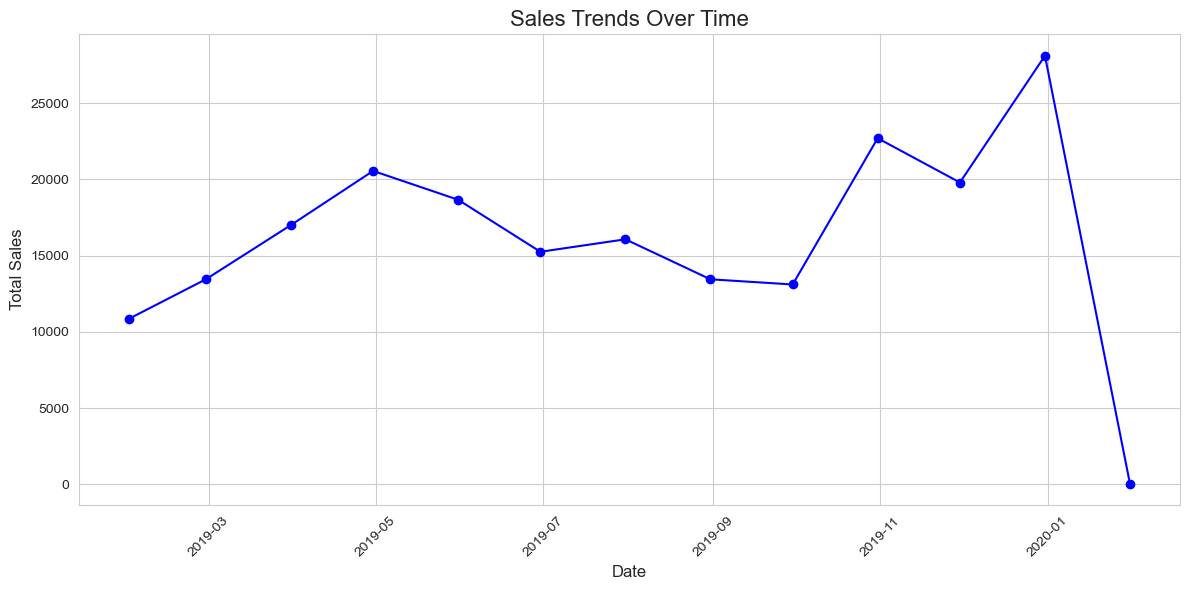

C:\Users\johnw\AppData\Local\Temp\ipykernel_16416\2025887395.py:27: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sales_trend = data.resample('M', on='Order Date')['Sales'].sum()


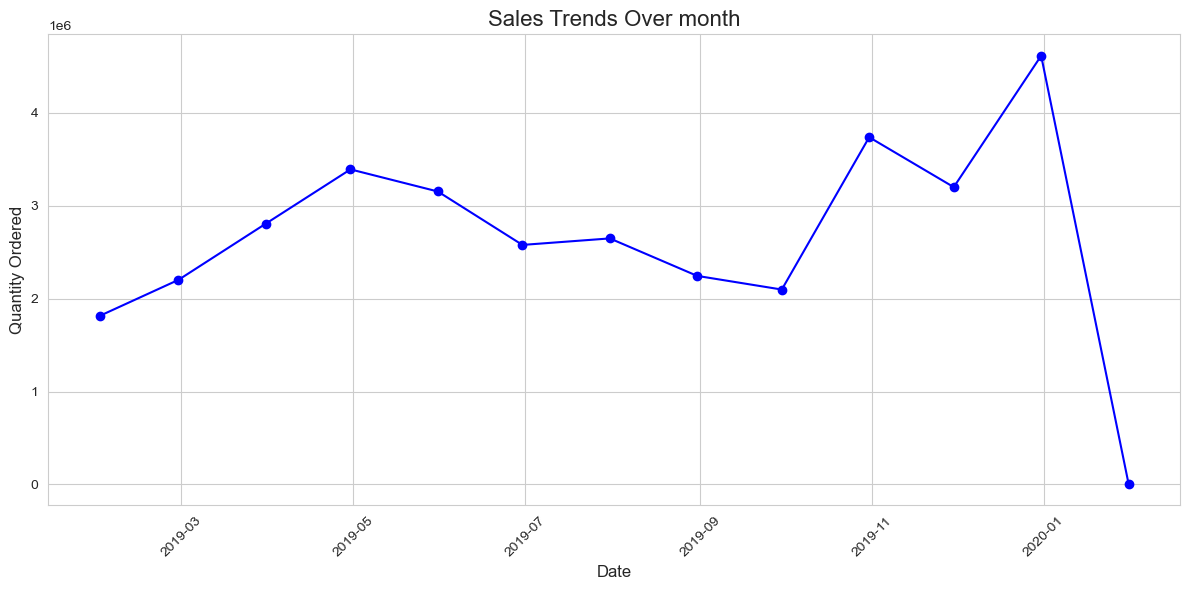

In [85]:
import matplotlib.pyplot as plt
data = pd.read_csv('Sales Data.csv')

data['Order Date'] = pd.to_datetime(data['Order Date'])

# Aggregate sales by month
sales_trend = data.resample('M', on='Order Date')['Quantity Ordered'].sum()

# Plot sales trend
plt.figure(figsize=(12, 6))
plt.plot(sales_trend.index, sales_trend, marker='o', linestyle='-', color='b')
plt.title('Sales Trends Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Resample sales data by month
import matplotlib.pyplot as plt
data = pd.read_csv('Sales Data.csv')
data['Order Date'] = pd.to_datetime(data['Order Date'])

# Aggregate sales by month
sales_trend = data.resample('M', on='Order Date')['Sales'].sum()
plt.figure(figsize=(12, 6))
plt.plot(sales_trend.index, sales_trend, marker='o', linestyle='-', color='b')
plt.title('Sales Trends Over month', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Quantity Ordered', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


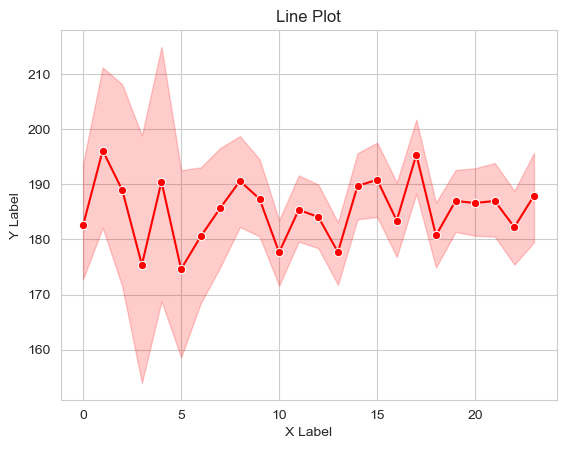

In [199]:
# Plotting profit trends over time
import matplotlib.pyplot as plt
df = pd.read_csv('Sales Data.csv')

# Aggregate sales by month

sns.lineplot(x=df["Hour"], y=df["Sales"], data=df, marker='o', color='r')


plt.xlabel('X Label')
plt.ylabel('Y Label')
plt.title('Line Plot')
plt.grid(True)


plt.show()





In [89]:
# Identifying top-performing product categories based on total sales and profit
import pandas as pd

data = pd.read_csv('Sales Data.csv')  


print(data.head())

print(data.columns)

product_performance = data.groupby('Product')[['Sales']].sum().reset_index()


product_performance_sorted = product_performance.sort_values(by='Sales', ascending=False)

print(product_performance_sorted.head())



   Unnamed: 0  Order ID               Product  Quantity Ordered  Price Each  \
0           0    295665    Macbook Pro Laptop                 1     1700.00   
1           1    295666    LG Washing Machine                 1      600.00   
2           2    295667  USB-C Charging Cable                 1       11.95   
3           3    295668      27in FHD Monitor                 1      149.99   
4           4    295669  USB-C Charging Cable                 1       11.95   

            Order Date                        Purchase Address  Month  \
0  2019-12-30 00:01:00  136 Church St, New York City, NY 10001     12   
1  2019-12-29 07:03:00     562 2nd St, New York City, NY 10001     12   
2  2019-12-12 18:21:00    277 Main St, New York City, NY 10001     12   
3  2019-12-22 15:13:00     410 6th St, San Francisco, CA 94016     12   
4  2019-12-18 12:38:00           43 Hill St, Atlanta, GA 30301     12   

     Sales            City  Hour  
0  1700.00   New York City     0  
1   600.00   New

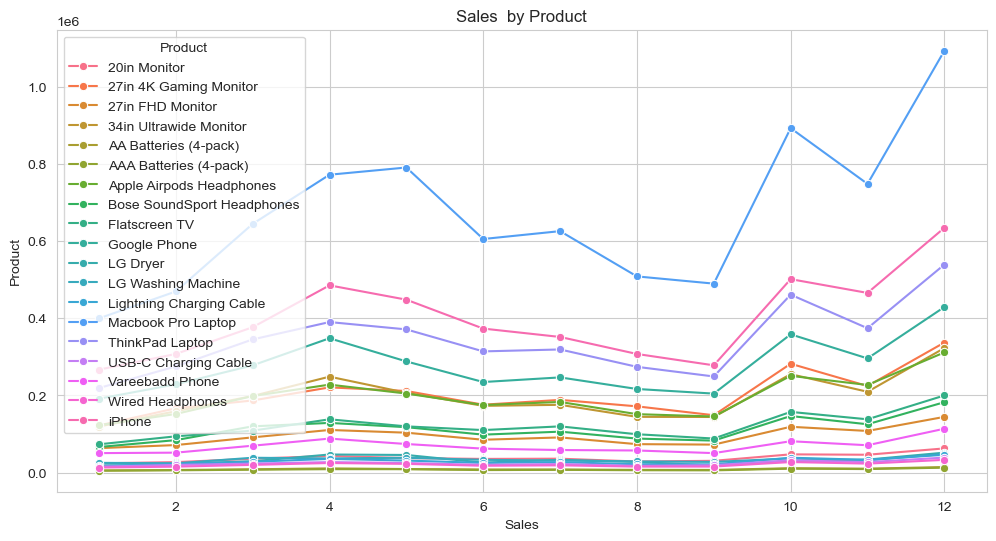

In [213]:

# Plotting total sales by product category

import matplotlib.pyplot as plt
import seaborn as sns


data['Order Date'] = pd.to_datetime(data['Order Date'])


monthly_sales = data.groupby([data['Order Date'].dt.month, 'Product'])['Sales'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x="Order Date", y="Sales", hue="Product", marker="o")

plt.title('Sales  by Product')
plt.xlabel('Sales')
plt.ylabel('Product')


plt.show()



In [93]:
# Generating summary statistics for each region
summary_stats = data.groupby('City')['Sales'].agg(
    total_sales='sum',
    average_sales='mean',
    transaction_count='count'
).reset_index()

# Display the summary statistics
print(summary_stats)


             City  total_sales  average_sales  transaction_count
0         Atlanta   2795498.58     187.856903              14881
1          Austin   1819581.75     183.703357               9905
2          Boston   3661642.01     183.688272              19934
3          Dallas   2767975.40     186.772969              14820
4     Los Angeles   5452570.80     184.177362              29605
5   New York City   4664317.43     187.502711              24876
6        Portland   2320490.61     186.160498              12465
7   San Francisco   8262203.91     184.704550              44732
8         Seattle   2747755.48     186.516120              14732


C:\Users\johnw\AppData\Local\Temp\ipykernel_16416\3882861602.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Price Each', y='Sales', data=data, palette='viridis')


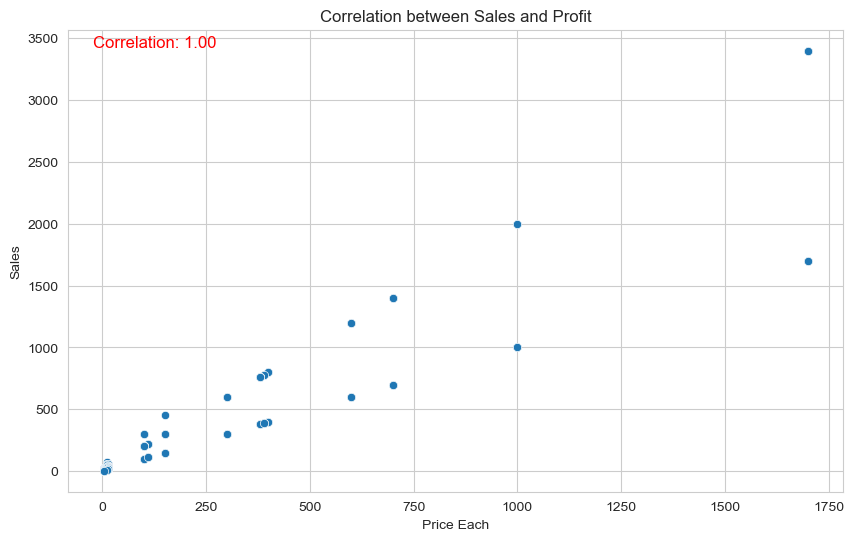

In [265]:
# Visualizing the correlation between sales and profit
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price Each', y='Sales', data=data, palette='viridis')

# Add labels and title
plt.title('Correlation between Sales and Profit')
plt.xlabel('Price Each')
plt.ylabel('Sales')

# Displaying the correlation coefficient (optional)
correlation = data['Price Each'].corr(data['Sales'])
plt.figtext(0.15, 0.85, f'Correlation: {correlation:.2f}', fontsize=12, color='red')

# Show the plot
plt.show()



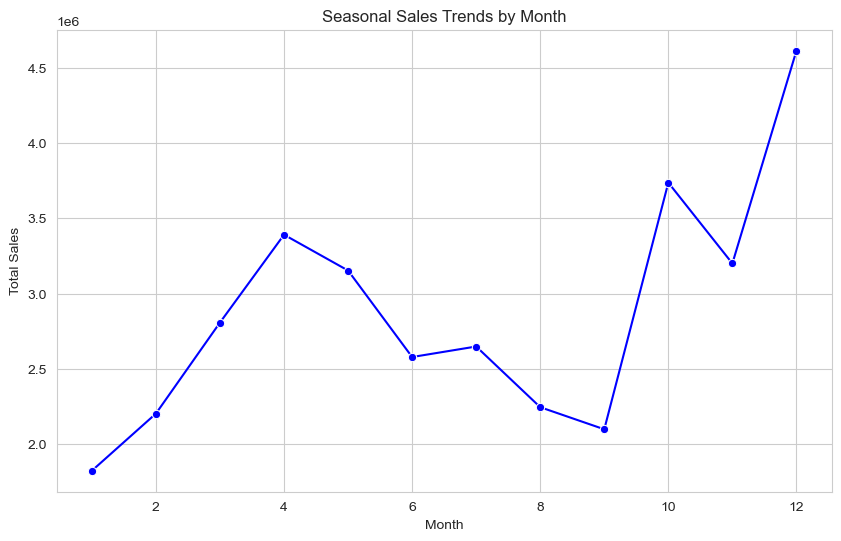

KeyError: 'Order Date'

In [267]:
# Analyzing seasonal sales trends
monthly_sales = data.groupby('Month')['Sales'].sum().reset_index()

# Plotting seasonal sales trends by month
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Sales', data=monthly_sales, marker='o', color='b')

# Add labels and title
plt.title('Seasonal Sales Trends by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')

# Display the plot
plt.show()



# Grouping sales data by month and year
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

# Grouping data by Year and Month, summing Sales
monthly_yearly_sales = df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

# Plotting total sales by Month and Year
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Sales', hue='Year', data=monthly_yearly_sales, marker='o')

plt.title('Sales Trend by Month and Year')
plt.xlabel('Month')
plt.ylabel('Total Sales')

plt.show()


# Plotting seasonal sales trends
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d-%m-%Y %H:%M')

# Extract Year and Month from Order Date
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

# Grouping data by Year and Month, summing Sales
monthly_sales = df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

# Plotting seasonal sales trends by Month
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Sales', hue='Year', data=monthly_sales, marker='o')


plt.title('Seasonal Sales Trends by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')

plt.show()



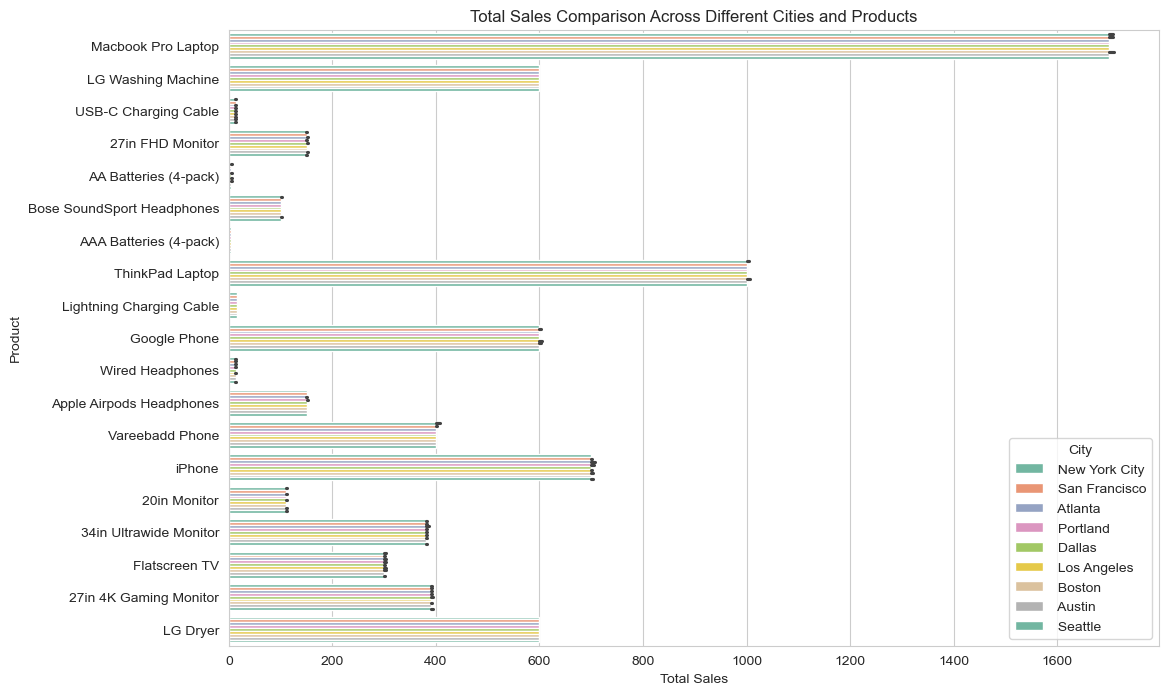

In [103]:
# Comparing sales across different ship modes
plt.figure(figsize=(12, 8))
sns.barplot(x='Sales', y='Product', hue='City', data=data, palette='Set2')

plt.title('Total Sales Comparison Across Different Cities and Products')
plt.xlabel('Total Sales')
plt.ylabel('Product')


plt.show()



In [261]:
import pandas as pd

# Load your data
df = pd.read_csv('Sales Data.csv')  # Replace with your actual file path

# Clean the column names
df.columns = df.columns.str.strip()  # Remove leading/trailing spaces
df.columns = df.columns.str.replace(' ', '_')  # Replace spaces with underscores
df.columns = df.columns.str.lower()  # Convert to lowercase
print(df.head())

# Print column names to verify
print(df.columns)

# Ensure 'order_date' column is datetime type
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
print(df['order_date'].dtype)

# Drop rows where 'order_date' couldn't be converted to datetime
df = df.dropna(subset=['order_date'])
print(df.isnull().sum())

# Resample sales data by month
df.set_index('order_date', inplace=True)
monthly_sales = df['sales'].resample('M').sum()

print(monthly_sales)



   unnamed:_0  order_id               product  quantity_ordered  price_each  \
0           0    295665    Macbook Pro Laptop                 1     1700.00   
1           1    295666    LG Washing Machine                 1      600.00   
2           2    295667  USB-C Charging Cable                 1       11.95   
3           3    295668      27in FHD Monitor                 1      149.99   
4           4    295669  USB-C Charging Cable                 1       11.95   

            order_date                        purchase_address  month  \
0  2019-12-30 00:01:00  136 Church St, New York City, NY 10001     12   
1  2019-12-29 07:03:00     562 2nd St, New York City, NY 10001     12   
2  2019-12-12 18:21:00    277 Main St, New York City, NY 10001     12   
3  2019-12-22 15:13:00     410 6th St, San Francisco, CA 94016     12   
4  2019-12-18 12:38:00           43 Hill St, Atlanta, GA 30301     12   

     sales            city  hour  
0  1700.00   New York City     0  
1   600.00   New

C:\Users\johnw\AppData\Local\Temp\ipykernel_16416\2627611358.py:25: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df['sales'].resample('M').sum()
